# Project 2: Reproducibility in Natural Language Processing



## Part 1: Data Loading and Initial Exploration

The data for this project is stored in the `data` folder, in the `SOTU.csv` file. The data file is structured as a CSV with columns for president name, speech text, year, and word count in the speech. 

This section:

1. Imports the data into a pandas dataframe
2. Performs exploratory data analysis (EDA) including specifically analyzing:
- Number of speeches per president
- Number of speeches per year
- Word count distribution
- Word count distribution accross years using a rug plot
- Average word count per president
3. A commentary on the findings

First, create the `conda` environment with the provided yaml file. Note, it's not unusual for it to take ~15 minutes for the environment to fully install.

### Read Data

In [27]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-dark') 

In [28]:
# read in SOTU.csv using pandas, name the variable `sou` for simplicity
# the below cell is what the output should look like
sou = pd.read_csv('data/SOTU.csv')

In [29]:
sou

,President,Year,Text,Word Count
0,Joseph R. Biden,2024.0,"\n[Before speaking, the President presented hi...",8003
1,Joseph R. Biden,2023.0,\nThe President. Mr. Speaker——\n[At this point...,8978
2,Joseph R. Biden,2022.0,"\nThe President. Thank you all very, very much...",7539
3,Joseph R. Biden,2021.0,\nThe President. Thank you. Thank you. Thank y...,7734
4,Donald J. Trump,2020.0,\nThe President. Thank you very much. Thank yo...,6169
...,...,...,...,...
241,George Washington,1791.0,\nFellow-Citizens of the Senate and House of R...,2264
242,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069
243,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069
244,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069


### Exploratory Data Analysis

Replicate the plots below using the hints specified. For each plot, provide some commentary describing the results/anything interesting you might see.

#### Number of Speeches per President

In [30]:
# Hint - use value_counts() on the President column
# Hint - sort in order of dataframe
counts = sou["President"].value_counts(sort=False)

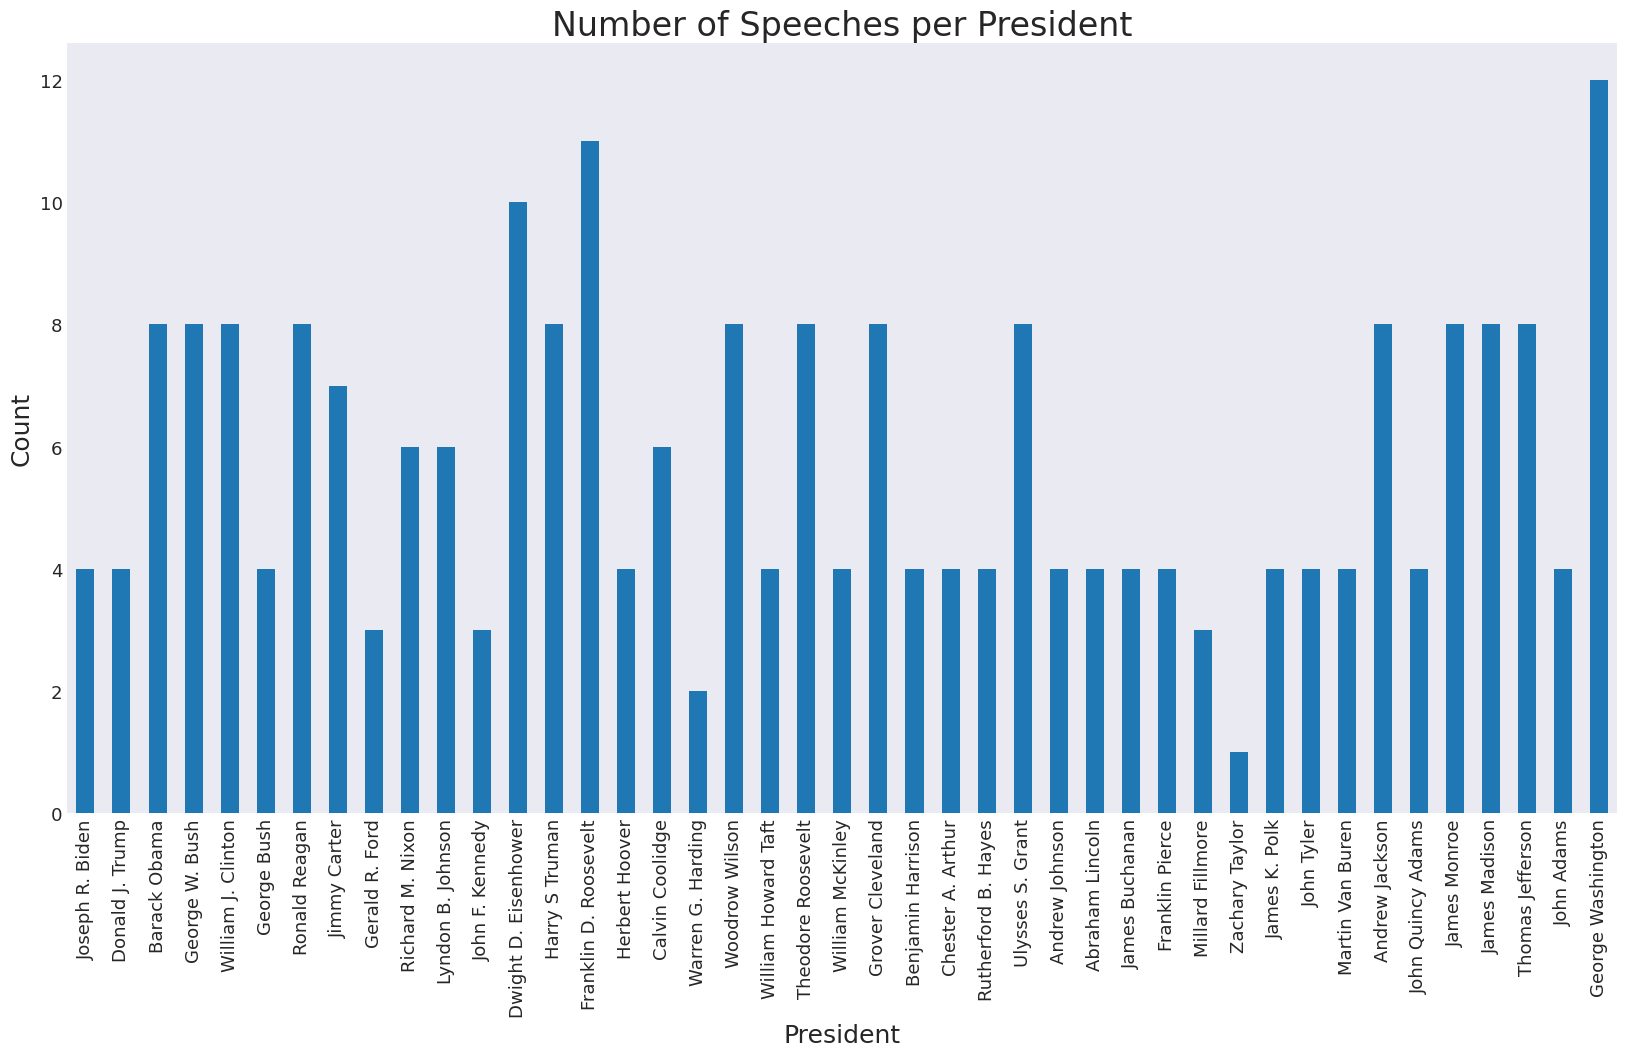

<Figure size 640x480 with 0 Axes>

In [31]:
# Plot 
# Hint - use the .plot() method for Pandas Series, make sure all presidents show up on x-axis

counts.plot(kind="bar", figsize=(20, 10))
plt.title("Number of Speeches per President", fontsize=24)
plt.xlabel("President", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=13)

plt.show()
plt.savefig("outputs/num_speeches.png")

#### Number of Speeches per Year

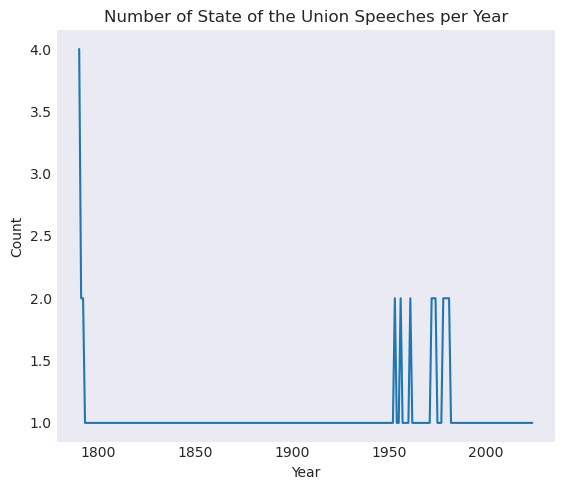

<Figure size 640x480 with 0 Axes>

In [32]:
# Hint - Use value counts and sort by years
counts_by_year = sou["Year"].value_counts().sort_index()

plt.figure(figsize=(5.75, 5))
counts_by_year.plot(kind="line")

plt.title("Number of State of the Union Speeches per Year")
plt.xlabel("Year")
plt.ylabel("Count")

plt.tight_layout()
plt.show()
plt.savefig("outputs/num_speeches_year.png")

#### Word Count Distribution 

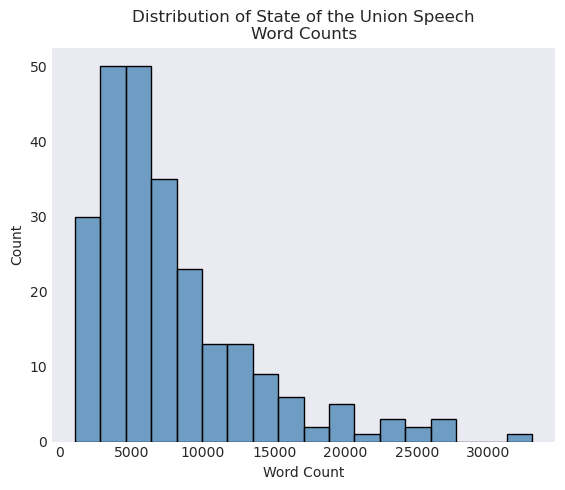

<Figure size 640x480 with 0 Axes>

In [33]:
# Hint - try seaborn.histplot()

plt.figure(figsize=(5.75, 5))

sns.histplot(
    sou["Word Count"],
    bins=18,
    kde=False,
    color="steelblue"
)

plt.title("Distribution of State of the Union Speech\nWord Counts")
plt.xlabel("Word Count")
plt.ylabel("Count")

plt.tight_layout()
plt.show()
plt.savefig("outputs/dist_word_counts.png")

#### Word Count Distribution over Year

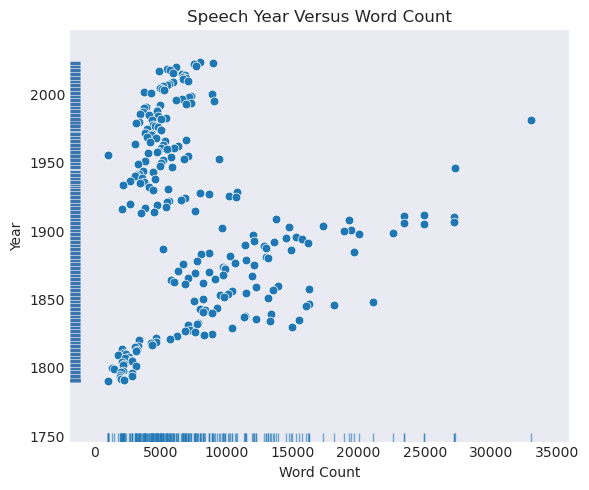

<Figure size 640x480 with 0 Axes>

In [34]:
# Hint: try seaborn.rugplot()
plt.figure(figsize=(6, 5))

sns.scatterplot(
    data=sou,
    x="Word Count",
    y="Year",
    s=40
)

sns.rugplot(
    data=sou,
    x="Word Count",
    height=0.02,
    alpha=0.6,
)

sns.rugplot(
    data=sou,
    y="Year",
    height=0.02,
    alpha=1,
    color=(59/255, 117/255, 174/255)
)

plt.title("Speech Year Versus Word Count")
plt.xlabel("Word Count")
plt.ylabel("Year")

plt.tight_layout()
plt.show()
plt.savefig("outputs/speech_vs_word_count.png")

#### Word Count Distribution per President

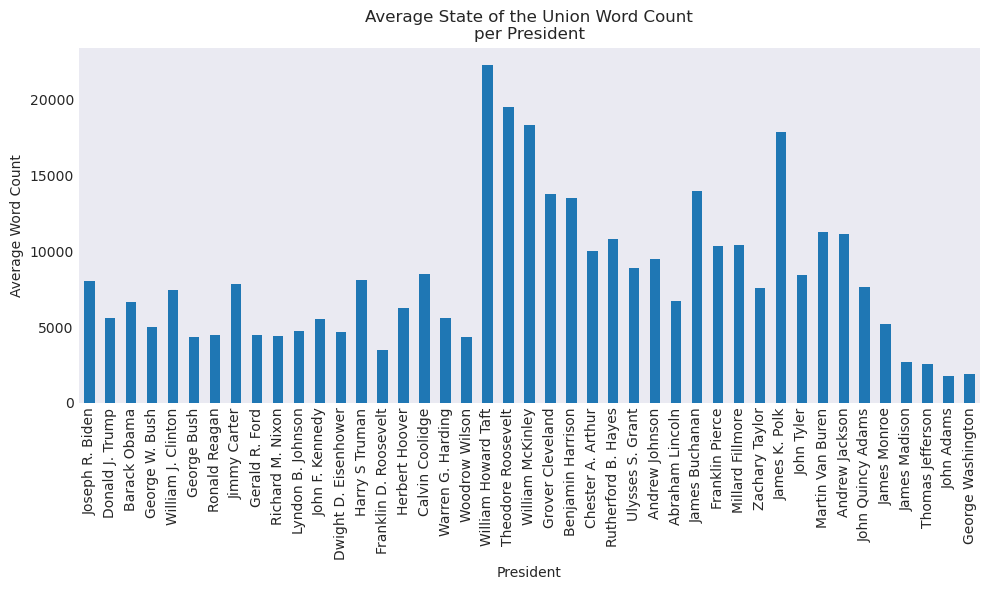

<Figure size 640x480 with 0 Axes>

In [36]:
# Hint: use pandas groupby to get mean word count per president then sort by order

avg_words = sou.groupby("President")["Word Count"].mean()

avg_words = avg_words.loc[sou["President"].unique()]
plt.figure(figsize=(10, 6))
avg_words.plot(kind="bar")

plt.title("Average State of the Union Word Count\nper President")
plt.xlabel("President")
plt.ylabel("Average Word Count")

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
plt.savefig("outputs/avg_sou_wc_president.png")